In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [57]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [59]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [60]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [61]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [62]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station


In [63]:
# Create a session
Session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
# Find the most recent date in the data set.
Recent_Date= Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recent_Date

('2017-08-23',)

Text(0, 0.5, 'Inches')

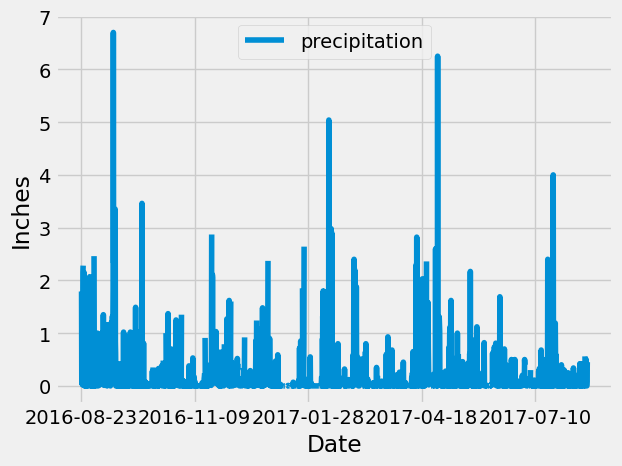

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
Last_date= dt.date(*map(int, Recent_Date[0].split('-'))) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
Precipitation = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation_df = pd.DataFrame(Precipitation ,columns = ['Date','precipitation'])

# Sort the dataframe by date
Precipitation_df.sort_values('Date',inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_df.plot('Date','precipitation')
plt.xlabel("Date")
plt.ylabel('Inches')



In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number of stations in the dataset
Session.query(func.count(Station.id)).all()

[(9,)]

In [68]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stn = [Measurement.station, func.count(Measurement.date)]
station_activity = Session.query(*most_active_stn).\
      group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Active = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Active

[(54.0, 85.0, 71.66378066378067)]

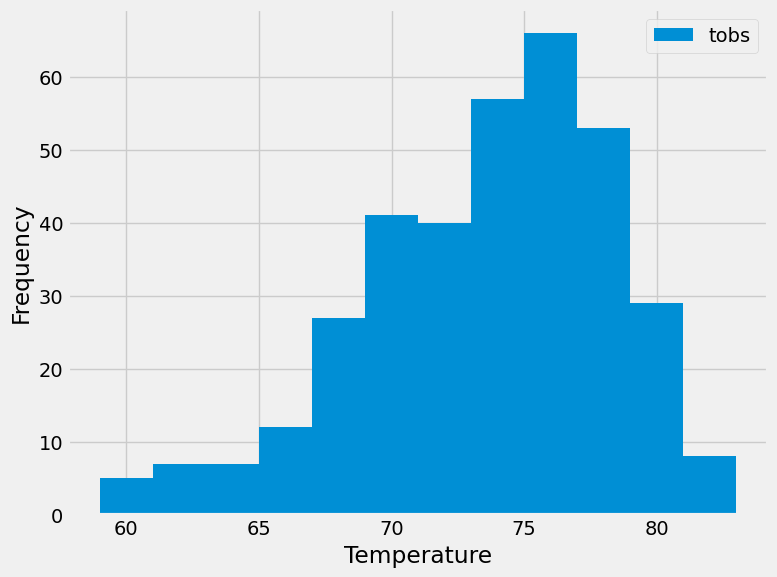

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp = dt.date(*map(int, Recent_Date[0].split('-'))) - dt.timedelta(days=365)

data = Session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= Temp).all()

dataframe = pd.DataFrame(data, columns=['Date', 'Temperature'])


#plot

plt.figure(figsize=(8, 6))
plt.hist(dataframe['Temperature'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

plt.show()



# Close Session

In [71]:
# Close Session
Session.close()
